In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


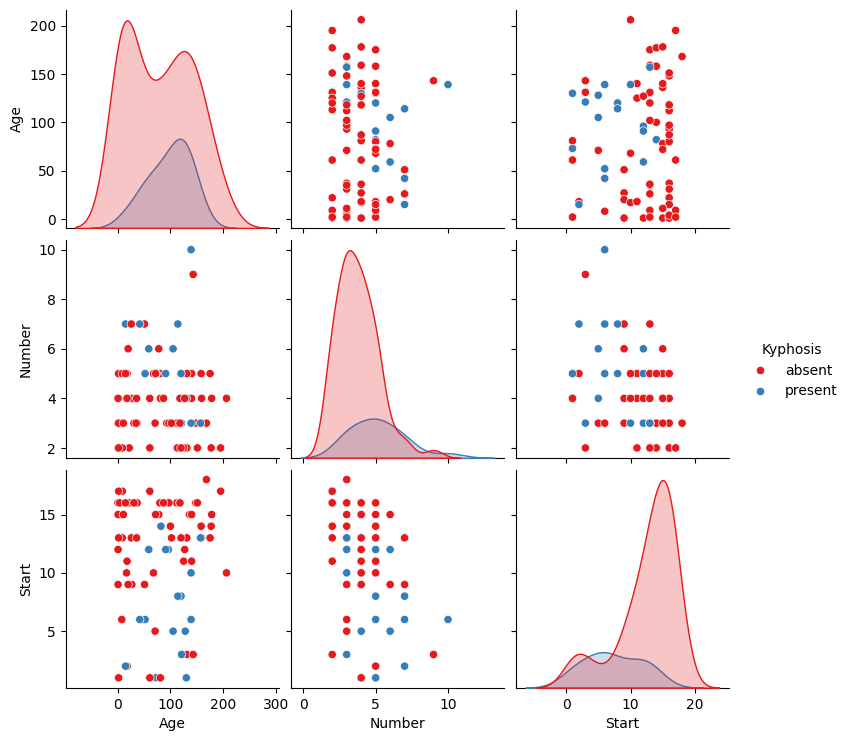

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.75      0.81        20
     present       0.38      0.60      0.46         5

    accuracy                           0.72        25
   macro avg       0.63      0.68      0.64        25
weighted avg       0.78      0.72      0.74        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[15  5]
 [ 2  3]]


In [17]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

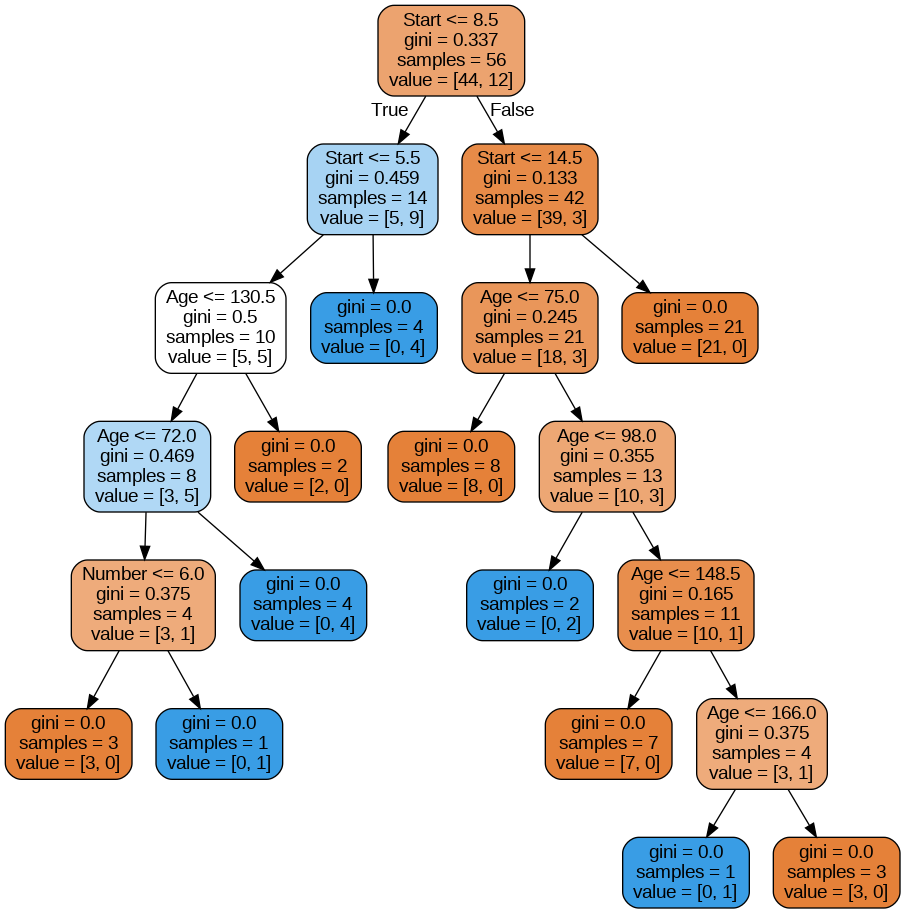

In [18]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[17  3]
 [ 3  2]]


In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



In [23]:
print(df['Kyphosis'].value_counts())

Kyphosis
absent     64
present    17
Name: count, dtype: int64


In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [25]:
print(y_train_resampled.value_counts())

Kyphosis
absent     44
present    44
Name: count, dtype: int64


In [26]:
dtree_resampled = DecisionTreeClassifier()
dtree_resampled.fit(X_train_resampled, y_train_resampled)

rfc_resampled = RandomForestClassifier(n_estimators=100)
rfc_resampled.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [27]:
dtree_resampled_pred = dtree_resampled.predict(X_test)
rfc_resampled_pred = rfc_resampled.predict(X_test)

print("Decision Tree Classifier with Resampling:")
print(classification_report(y_test, dtree_resampled_pred))
print(confusion_matrix(y_test, dtree_resampled_pred))

print("\nRandom Forest Classifier with Resampling:")
print(classification_report(y_test, rfc_resampled_pred))
print(confusion_matrix(y_test, rfc_resampled_pred))

Decision Tree Classifier with Resampling:
              precision    recall  f1-score   support

      absent       0.88      0.75      0.81        20
     present       0.38      0.60      0.46         5

    accuracy                           0.72        25
   macro avg       0.63      0.68      0.64        25
weighted avg       0.78      0.72      0.74        25

[[15  5]
 [ 2  3]]

Random Forest Classifier with Resampling:
              precision    recall  f1-score   support

      absent       0.94      0.85      0.89        20
     present       0.57      0.80      0.67         5

    accuracy                           0.84        25
   macro avg       0.76      0.82      0.78        25
weighted avg       0.87      0.84      0.85        25

[[17  3]
 [ 1  4]]
